In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('HousePrice.csv')

In [5]:
df.head()

,Unnamed: 0,beds,baths,size,zip_code,price
0,0,3,2.5,2590.0,98144,795000.0
1,1,4,2.0,2240.0,98106,915000.0
2,2,4,3.0,2040.0,98107,950000.0
3,3,4,3.0,3800.0,98199,1950000.0
4,4,2,2.0,1042.0,98102,950000.0


In [6]:
df=df.drop(columns=["Unnamed: 0"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   zip_code  2016 non-null   int64  
 4   price     2016 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 78.9 KB


In [8]:
df.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [9]:
df["price"] = np.log(df["price"])

In [10]:
df.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,2.857639,2.159970,1735.740575,98123.638889,13.622434
std,1.255092,1.002023,920.132591,22.650819,0.515034
min,1.000000,0.500000,250.000000,98101.000000,11.976659
25%,2.000000,1.500000,1068.750000,98108.000000,13.307597
50%,3.000000,2.000000,1560.000000,98117.000000,13.592367
75%,4.000000,2.500000,2222.500000,98126.000000,13.915582
max,15.000000,9.000000,11010.000000,98199.000000,17.034386


In [11]:
df.columns

Index(['beds', 'baths', 'size', 'zip_code', 'price'], dtype='object')

In [12]:
df.dtypes

beds          int64
baths       float64
size        float64
zip_code      int64
price       float64
dtype: object

In [15]:
df.isnull().sum()

beds        0
baths       0
size        0
zip_code    0
price       0
dtype: int64

In [16]:
for column in ["beds", "baths", "size", "price"]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

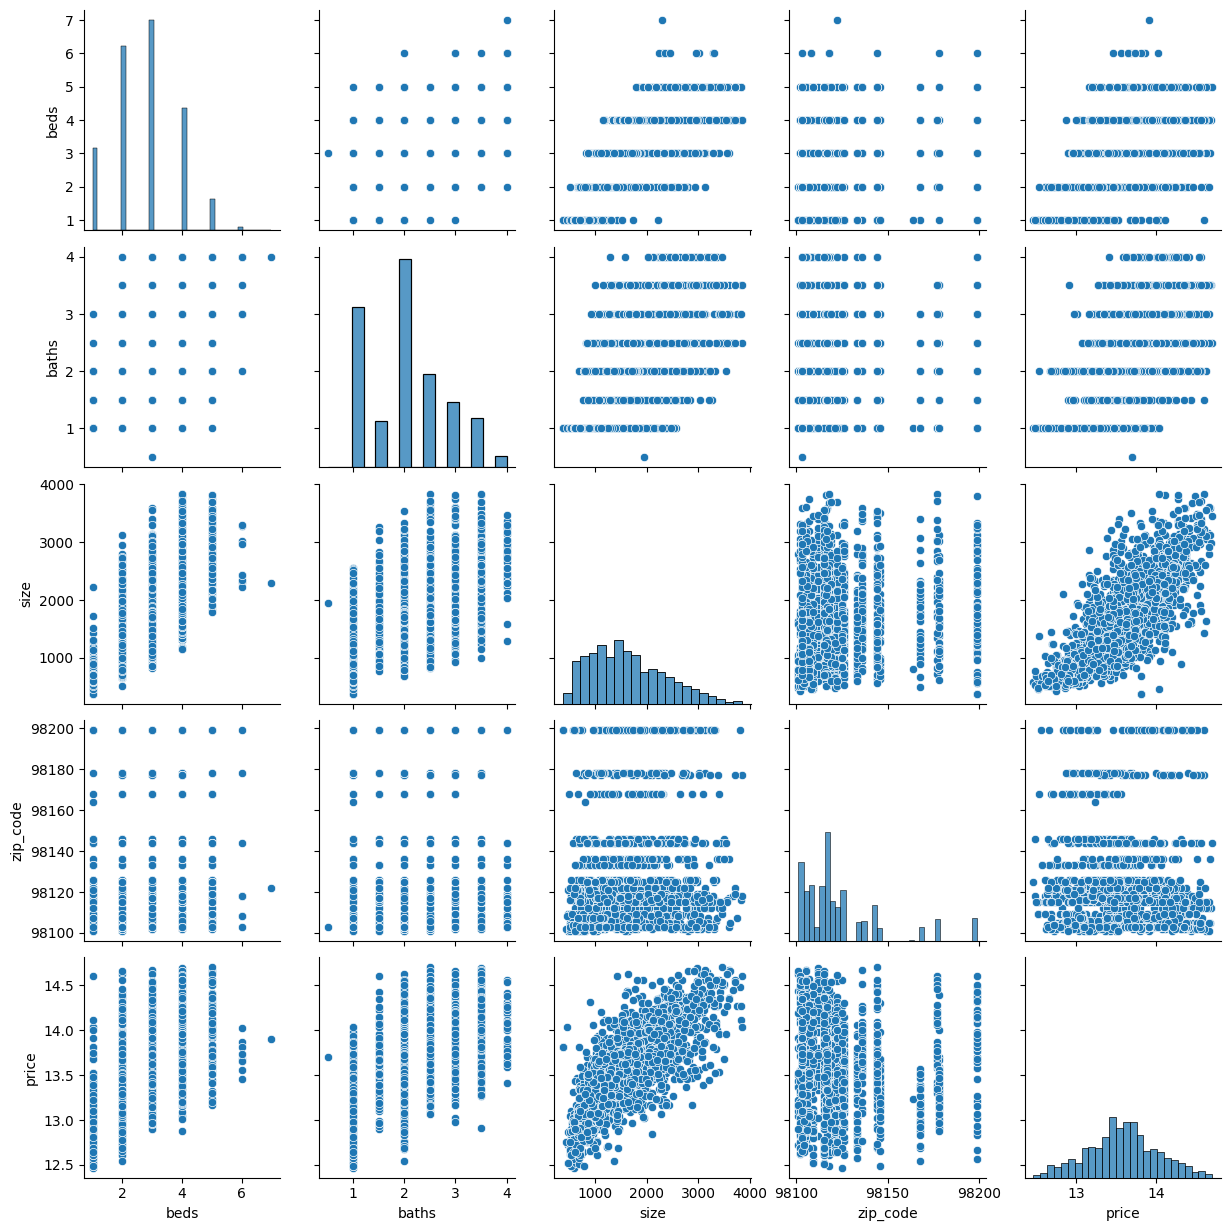

In [17]:
sns.pairplot(df)

<Axes: >

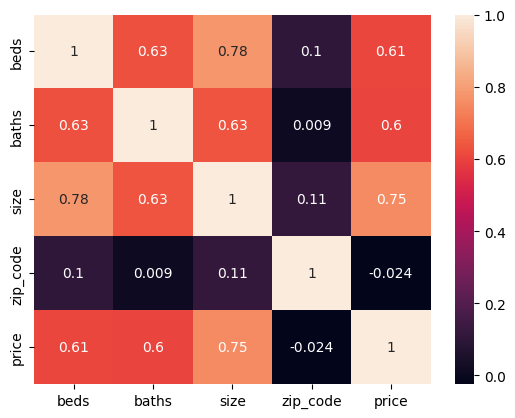

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
X=df[['beds','baths','size']]
y=df['price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
X_train

array([[-0.70370655, -0.6785088 , -0.69874575],
       [ 0.21117247, -0.05561548, -0.42599247],
       [-0.70370655, -0.05561548, -1.05041748],
       ...,
       [ 1.1260515 ,  1.8130645 ,  1.76434091],
       [ 1.1260515 ,  1.8130645 , -0.00509402],
       [ 1.1260515 , -0.05561548,  0.99177072]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm=LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [28]:
coeff_df

,Coefficient
beds,-0.011467
baths,0.098745
size,0.275159


In [29]:
prediction=lm.predict(X_test)

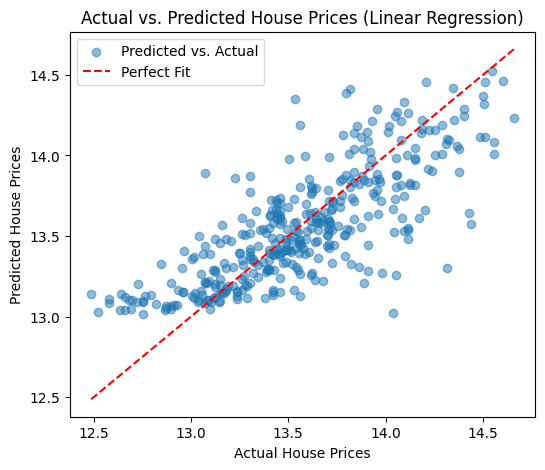

In [34]:

plt.figure(figsize=(6,5))
plt.scatter(y_test, prediction, alpha=0.5, label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.legend()
plt.show()


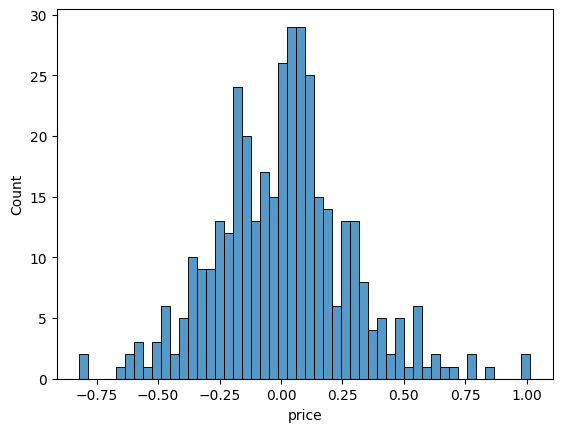

In [35]:
sns.histplot((y_test-prediction),bins=50);

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))
r2 = r2_score(y_test, prediction)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 0.20935684477461905
RMSE: 0.2754097421702724
R² Score: 0.6084057857451401
